# 나무 기반 모델(Tree-Based Models)

* 회귀와 분류 문제에 모두 사용 가능
* 예측변수 공간(predictor space)을 여러 개의 구역으로 구획(stratifying or segmenting)한다.
* 새로운 데이터에 대해 예측하기 위해서는 그 데이터가 속한 구역에 있는 학습 데이터셋의 평균이나 최빈값을 이용한다.
* 구역을 나누는 규칙을 나무(tree)로 표현할 수 있기 때문에, 이런 접근을 의사 결정 나무(decision tree)로 부른다.

## (참고) 나무(tree)란

  * 컴퓨터 과학에서는 점(nodes or vertices)와 연결선(edge)으로 이루어진 데이터 구조를 그래프(graph)라고 부른다.
    * 그림으로 나타내는 플롯(plot)이라는 뜻의 그래프랑은 다르다.
  * 자기 자신으로 다시 돌아오는 길(cycle)이 없고, 서로 다른 두 점을 잇는 길이 하나일 때 나무(tree)라고 부른다.

![tree](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Binary_tree.svg/300px-Binary_tree.svg.png)

  * 최상위 노드를 뿌리 노드(root node)라고 부르고, 노드 A가 노드 B를 가리킬 때 A를 B의 **부모 노드**(parent node), B를 A의 **자식 노드**(child node)라고 한다.
  * 자식 노드가 없는 노드를 **잎 노드**(leaf node or terminal node)라고 한다.  잎 노드가 아닌 노드를 **내부 노드**(internal node)라고 한다.
  * 보통 트리는 뿌리 노드(root node)를 맨 위로, 잎 노드를 맨 아래에 두고 나무를 뒤집어서 그린다.
  * 잎 노드가 아닌 노드가 자식 노드를 정확히 두개만 갖고 있을 때, 이런 트리를 이진 트리(binary tree)라고 부른다.
  * 의사 결정 나무(decision tree)는 이진 트리(binary tree)이다.

### 의사 결정 나무의 특징
* 간단하고 해석하기 쉽다.
* 정확도는 다소 낮다.
* 배깅(bagging), 랜덤 포레스트(random forests), 부스팅(boosting) 등 앙상블 기법과 함께 자주 사용된다.
* 수많은 의사 결정 나무를 결합하는 것이 성능을 크게 향상시킬 수 있다는 것을 보게 될 것이다.
* 단, 의사 결정 나무의 갯수가 많으면 모델의 해석은 더 어려워진다.

* 의사 결정 나무에 기반한 앙상블(ensemble) 기법은 머신 러닝에서 가장 널리 쓰이는 모델이다.  
* 실제로, 2015년에 Kaggle에서 우승하고 알고리즘을 공개한 29개의 우승 모델 중, 17개의  모델이 나무 기반 앙상블 모델 중 하나인 [XGBoost](https://arxiv.org/pdf/1603.02754.pdf)라는 모델을 사용했다. 

# 의사 결정 나무 (Decision Trees)

* 회귀와 분류 문제 모두에 적용할 수 있다.
* 회귀 문제부터 보자.

## 회귀 나무 (Regression Trees)

#### 예시 : 회귀 나무를 이용해서 야구 선수의 연봉을 예측하기
야구 선수의 경력과 작년에 몇 번 공을 쳤는지를 이용해서 타자의 연봉을 예측하는 모델

![regression tree](https://files.slack.com/files-pri/T25783BPY-F61GKBZS7/screenshot.png?pub_secret=4aec3d86dd)

### 해석 
경력이 4.5년이 안되는 야구선수는 연봉을 5.11을 받고, 경력이 4.5년보다 많은 야구 선수는 작년 타수가 117.5보다 작으면 6.00, 크면 6.74를 받는다.

* 정확히는 연봉의 log를 취한 값을 예측
* 그래서 $1,000×e^{6.740} = $845,346 
* 잎 노드에 있는 숫자는 학습 데이터 중에 해당 구역으로 떨어진 야구 선수들 연봉의 평균이다.

![partitionn](https://files.slack.com/files-pri/T25783BPY-F612PHRK3/screenshot.png?pub_secret=8c0388dd27)

세 구역은 다음과 같이 수학적으로 표현 가능하다.
* R1 ={X | Years<4.5}
* R2 ={X | Years>=4.5, Hits<117.5}
* R3 ={X | Years>=4.5, Hits>=117.5}

### 해석
  * 경력은 연봉을 결정하는 데 가장 중요한 요소이다.
  * 경력이 적으면 연봉이 평균적으로 낮다.
  * 야구선수의 경력이 적으면, 작년에 몇번 공을 쳤는지는 중요하지 않다.
  * 그러나 야구선수의 경력이 5년 이상이면, 작년에 기록한 타수가 연봉에 영향을 미친다.
  * 타수가 높은 타자는 다른 타자들보다 평균적으로 연봉을 많이 받는다.

* 아마 위의 모델은 현실을 설명하기에는 너무 단순한 모델일 것이다.
* 그러나 다른 회귀 모형보다, 의사 결정 나무는 해석하기 쉽고 그리기 쉽다는 장점이 있다.
* 예측 변수가 양적 변수(quantitative variable)이 아닌 질적 변수(qualitative)인 경우도 다룰 수 있다.

### 회귀 나무(regression tree) 만들기

![reg tree](http://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_0011.png)

### 1. 예측 변수 공간(predictor space)을 J개의 서로 다른 구역으로 나눈다.

예측 변수 공간(predictor space)이란 예측 변수 X1, X2, …, Xp가 취할 수 있는 값들의 조합을 말한다.

우리의 목적은 RSS를 최소화하는 R1, …, RJ를 찾는 것이다.
  $$
  \sum^J_{j=1}\sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2
  $$

우리는 예측 변수 공간을 고차원의 직사각형들(high dimensional rectanngles), 즉 박스들(boxes)로 나눈다.

### 직사각형인 이유

영역은 어떤 모양이어도 되지만, 계산하기 어렵고 해석하기 어려워진다.

### 구역을 나누는 방법

recursive binary splitting이라는 top-down, greedy 접근 방식을 사용한다.

### top-down

  * 루트 노드에서 출발한다. 
  * 루트 노드에서 두 개로 나눈다.
  * 그 뒤 이어서 내부 노드에서 예측 변수 공간을 나눈다.

### greedy

  * 각각의 단계에서 가장 좋은 구획을 잘 나누는 방법만을 택한다. 
  * 몇 단계 앞을 바라보고 지금은 별로라도 미래에 더 좋은 구획 나누기를 택하지 않는다.

### 의사 결정 나무 만들기

* Xj를 선택하고 나누는 기준(cutpoint) s를 선택해서 두 개의 구역으로 나눈다.

* 그 구역에서 위에서 언급한대로 평균값을 이용해 예측을 수행한다.

* 모든 예측 변수와 모든 가능한 나누는 기준(cutpoint)에 대해서 RSS를 구한다.

* 이 때 기존보다 가장 RSS를 크게 낮추는 Xj와 s를 선택한다.

* 그 다음에는, 나눠진 구역 중 하나에서 같은 일을 반복한다.

* 이 일을 미리 정한 멈추는 기준(stoppinng criterion)이 도달할 때까지 반복한다.

    * 예컨대, 모든 구역(region)에 학습 데이터가 5개 미만으로 남았을 때 그만둘 수 있다.

## 분류 나무 (Classification Trees)

* 회귀 나무와 거의 유사하다.
* 양적인(quantitative) 반응변수가 아닌 질적인(qualitative) 반응 변수를 사용한다.
* 분류 나무에서, 예측은 그 구역에서 평균이 아닌 **가장 자주 등장하는 클래스**로 결정된다.

### 분류 나무 만들기

* 역시 회귀 나무와 거의 유사하다.

* 다만 RSS는 더이상 쓸 수 없다.

## RSS의 대체재

### classification error rate

* 예측이 틀리는 비율

* 가장 자주 등장하는 클래스로 예측하기 때문에, 단순히 그 구역에서 가장 자주 등장하는 클래스가 아닌 학습 데이터의 비율이 된다.

### Gini index
$$
G = \sum^K_{k=1}{\hat{p}_{mk}}(1 - {\hat{p}_{mk}})
$$

* ${\hat{p}_{mk}}$ : m번째 구역에 있는 데이터 중 k번째 클래스에 해당하는 비율
* K개의 클래스로 얼마나 퍼져 있는지 재는 방법
* ${\hat{p}_{mk}}$가 0이나 1에 가까우면 Gini index는 작아진다.
* 그래서 Gini index를 노드의 순수성(purity)를 재는 지표라고 부르기도 한다.

### cross-entropy

$$
D = -\sum^K_{k=1}{\hat{p}_{mk}}\log{{\hat{p}_{mk}}}
$$

0보다 같거나 크다.

$$
0 \leq\hat{p}_{mk} \leq 1
$$

이기 때문에,

$$
0 \leq -\hat{p}_{mk}\log{\hat{p}_{mk}}
$$

이다.

* $\hat{p}_{mk}$가 모두 0이나 1에 가까울 때, cross-entropy는 0에 가까운 값을 가진다.

* Gini index처럼, cross-entropy도 노드가 순수할 때(purity) 0에 가까운 값을 가진다.

* Gini index와 cross-entropy 계산했을 때 거의 비슷한 값을 가진다.

트리를 만들 때, 보통 Gini index나 cross-entropy를 주로 사용한다.

* classification error rate에 비해서 노드가 얼마나 순수한지에 더 민감하기 때문.

## 트리(Trees)와 선형 모델(Linear Models)의 비교

* 어떤 모델이 더 좋을지는 주어진 문제에 달려있다.
* 특징 변수(features)와 반응 변수(responnse)의 관계가 선형적이면, 선형 회귀가 잘 동작한다.
* 특징 변수(features)와 반응 변수(responnse)의 관계가 심하게 비선형적이면, 의사 결정 모델이 더 잘할 수 있다.

![tree vs. linear](https://files.slack.com/files-pri/T25783BPY-F61LVAA2W/screenshot.png?pub_secret=3a3a5bd690)

* 정확도가 목적의 전부가 아닌 경우, 시각화나 해석 가능성 등의 이유로 트리 모델을 선택할 수도 있다.

# In code

In [5]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['malignant'] = 1 - breast_cancer.target # 0 for malignant and 1 for benign in the original dataset

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [13]:
X_train = data.drop('malignant', axis=1)
y = data['malignant']

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [15]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
model.score(x, y)

0.97891036906854134

In [17]:
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['not malignant', 'malignant'],  
                         filled=True, rounded=True,  
                         special_characters=True, impurity=False, proportion=True)  

In [18]:
import graphviz 

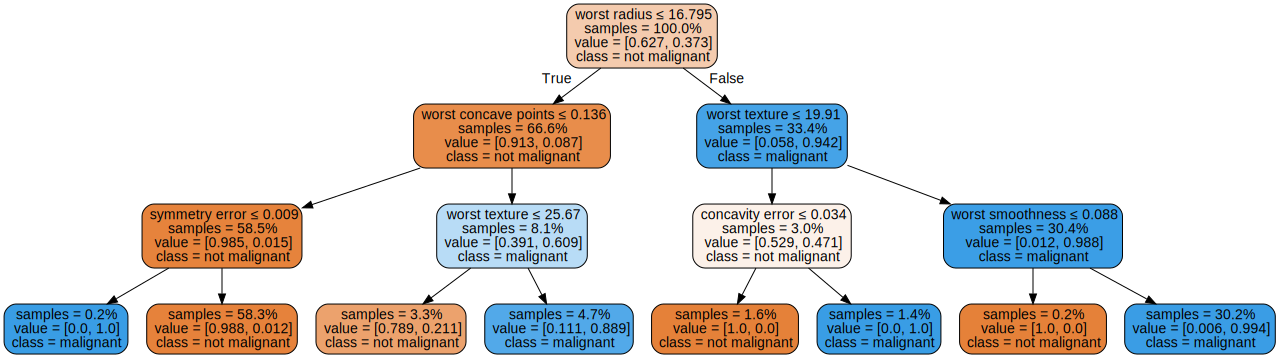

In [19]:
graph = graphviz.Source(dot_data)  
graph 

## 의사 결정 나무 (Decision Tree) 요약

장점

* 설명하기 쉽다. 심지어 선형 회귀보다도 설명하기 쉽다.
* 사람이 의사 결정하는 방식을 잘 표현한다.
* 나무를 그려볼 수 있다.
* 질적 변수(카테고리 변수)를 더미화하지 않고도 자연스럽게 다룰 수 있다.

단점

* 의사 결정 나무는 보통 다른 회귀나 분류 모델에 비해서 정확도가 떨어진다.